# The Titanic Problem...

The goal is to train the best model you can using the training data, then make your predictions on the test data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
rawTrainingData = pd.read_csv ('train.csv')
rawTestData     = pd.read_csv ('test.csv')

In [3]:
# Look at the first few lines of data to see if it was loaded ok...
rawTrainingData.head ()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
rawTestData.head ()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


From the webpage we are told a few things about the data...

* Name, Sex, Age: are pretty self-explanatory
* Survived: that's the target: 0 means the passenger did not survive, while 1 means they survived.
* Pclass: passenger class.
* SibSp: how many siblings and/or spouses of the passenger aboard the Titanic.
* Parch: how many parents/children passengers were aboard the Titanic.
* Ticket: ticket id
* Fare: price paid (in pounds)
* Cabin: passenger's cabin number
* Embarked: where the passenger embarked (boarded) the Titanic

In [5]:
# Look if any data is missing...
rawTrainingData.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
rawTestData.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Most things look ok except **Age**, **Cabin**, **Fare**, and **Embarked**.

**Cabin** 

In [7]:
rawTrainingData['Cabin'].value_counts ()

B96 B98        4
C23 C25 C27    4
G6             4
C22 C26        3
E101           3
              ..
C99            1
B38            1
C148           1
C45            1
C104           1
Name: Cabin, Length: 147, dtype: int64

There is a lot of missing Cabin values.  Also there is no noticable pattern.  Hence it will be removed/dropped from the dataset. 

**Age**

/Users/dennis/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/dennis/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


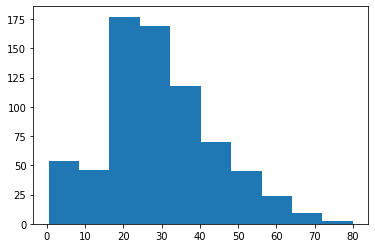

In [8]:
# first plot the age distribution
plt.figure ()
plt.hist (rawTrainingData['Age'])
plt.show ()

Since the age isn't a nice normal distribution, we shall use the median to fill in the missing values

In [9]:
rawTrainingData['Age'].median ()

28.0

**Fare**

It seems like only one value is missing.  First we shall plot the data...

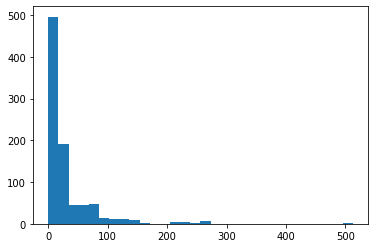

In [10]:
plt.figure ()
plt.hist (rawTrainingData['Fare'], bins=30)
plt.show ()

In [11]:
# look the the median value...
rawTrainingData['Fare'].median ()

14.4542

In [12]:
pd.cut (rawTrainingData['Fare'], [0, 10, 25, 1000]).value_counts()

(25, 1000]    334
(0, 10]       321
(10, 25]      221
Name: Fare, dtype: int64

**Embarked**

In [13]:
rawTrainingData['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
rawTrainingData[rawTrainingData['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


There is something funny with this... both had the same ticket number, stayed in the same room, one was french and married, the other was single and english.  Perhaps it is best to drop these two rows.

**Sex**

In [15]:
rawTrainingData['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

this is easy enough to convert to a numeric value

**Ticket**

In [16]:
rawTrainingData['Ticket'].value_counts()

1601        7
CA. 2343    7
347082      7
CA 2144     6
347088      6
           ..
226593      1
229236      1
3101276     1
112277      1
248747      1
Name: Ticket, Length: 681, dtype: int64

The ticket column can be grouped together...

In [17]:
rawTrainingData.groupby("Ticket")["Ticket"].count()

Ticket
110152         3
110413         3
110465         2
110564         1
110813         1
              ..
W./C. 6608     4
W./C. 6609     1
W.E.P. 5734    1
W/C 14208      1
WE/P 5735      2
Name: Ticket, Length: 681, dtype: int64

**Name**

In [18]:
rawTrainingData['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [19]:
titles = {'Mr.': 0, 'Mrs.': 0, 'Miss.': 0, 'Master.': 0, 'Important': 0, 'Other': 0}
for i, name in enumerate (rawTrainingData['Name']):
    nameTokens = name.split (' ')
    if 'Mr.' in nameTokens:
        titles['Mr.'] = titles['Mr.'] + 1
        
    elif 'Mrs.' in nameTokens or 'Mme.' in nameTokens or 'Ms.' in nameTokens:
        titles['Mrs.'] = titles['Mrs.'] + 1
            
    elif 'Miss.' in nameTokens or 'Mlle.' in nameTokens:
        titles['Miss.'] = titles['Miss.'] + 1
            
    elif 'Master.' in nameTokens:
        titles['Master.'] = titles['Master.'] + 1
            
    elif 'Dr.' in nameTokens or 'Capt' in nameTokens or 'Col' in nameTokens or \
         'Major' in nameTokens or 'Rev.' in nameTokens: 
        titles['Important'] = titles['Important'] + 1
            
    else: # Sir, Lady, Countess, Jonkheer, and Don
        titles['Other'] = titles['Other'] + 1
        
titles

{'Mr.': 517,
 'Mrs.': 127,
 'Miss.': 184,
 'Master.': 40,
 'Important': 13,
 'Other': 10}

### Transforming the data...

Lets make a function to clean up the data that will be used for both test and train sets

In [20]:
def TransformData (dataset):
    
    # Drop for now drop cabin, name, and ticket... in the future we will might try to use them
    transformedDataset = dataset.drop (['Cabin', 'Name', 'Ticket'], axis=1)    
    
    # Drop NA rows... looking at the embarked column...
    transformedDataset.dropna (axis=0, subset=['Embarked'], inplace=True)
    
    # Fill any missing ages with the median
    transformedDataset['Age'].fillna (transformedDataset['Age'].median(), inplace=True)
    
    # Fill any missing fares with the median
    transformedDataset['Fare'].fillna (transformedDataset['Fare'].median(), inplace=True)
        
    # One hot encode of the PClass column
    one_hot = pd.get_dummies (transformedDataset['Pclass'], prefix='PClass')
    transformedDataset.drop (['Pclass'], axis=1, inplace=True)
    transformedDataset = transformedDataset.join (one_hot)

    # One hot encode of the Embarked column
    one_hot = pd.get_dummies (transformedDataset['Embarked'], prefix='Embarked')
    transformedDataset.drop (['Embarked'], axis=1, inplace=True)
    transformedDataset = transformedDataset.join (one_hot)

    # One hot encode of the Sex column
    one_hot = pd.get_dummies (transformedDataset['Sex'], prefix='Sex')
    transformedDataset.drop (['Sex'], axis=1, inplace=True)
    transformedDataset = transformedDataset.join (one_hot)

    return transformedDataset

In [21]:
cleanedTrainingData = TransformData (rawTrainingData)

In [22]:
# make xTrain and yTrain data...
yTrain = cleanedTrainingData ['Survived']
xTrain = cleanedTrainingData.drop (['Survived', 'PassengerId'], axis=1)

In [35]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

from sklearn.model_selection import cross_val_score

In [24]:
svm_clf = SVC (gamma="auto")
svm_clf.fit (xTrain, yTrain)
svm_scores = cross_val_score(svm_clf, xTrain, yTrain, cv=10)
svm_scores.mean()

0.7323672114402452

In [25]:
rf_clf = RandomForestClassifier (random_state=0)
rf_clf.fit (xTrain, yTrain)
rf_scores = cross_val_score (rf_clf, xTrain, yTrain, cv=10)
rf_scores.mean()

/Users/dennis/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7975485188968335

In [26]:
logit_clf = LogisticRegression(random_state=0, solver='lbfgs', max_iter=10000)
logit_clf.fit (xTrain, yTrain)
logit_scores = cross_val_score (logit_clf, xTrain, yTrain, cv=10)
logit_scores.mean()

0.7987104187946884

In [27]:
model = xgb.XGBClassifier()
model.fit (xTrain, yTrain)
xgbScores = cross_val_score (model, xTrain, yTrain, cv=10)
xgbScores.mean()

0.8110061287027579

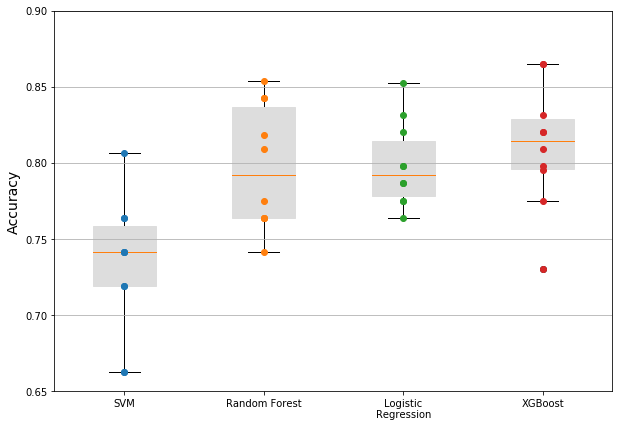

In [28]:
plt.figure(figsize=(10, 7))
c = '#dddddd'
plt.boxplot([svm_scores, rf_scores, logit_scores, xgbScores], \
            labels=("SVM","Random Forest", 'Logistic\nRegression', 'XGBoost'),\
            patch_artist=True, zorder=1, boxprops=dict(facecolor=c, color=c))
plt.plot([1]*10, svm_scores, "o")
plt.plot([2]*10, rf_scores, "o")
plt.plot([3]*10, logit_scores, "o")
plt.plot([4]*10, xgbScores, "o")
plt.ylabel("Accuracy", fontsize=14)
plt.grid (True, axis='y')
plt.ylim ([0.650, 0.9])
plt.show()

Things are ok but can perhaps can be improved.  We shall try to improve the data a bit...
* use the names to have titles
* bin the fares and ages
* classify the number of people someone is travelling with

In [29]:
def TransformData_V2 (dataset):
    
    # Drop for now drop cabin, name, and ticket... in the future we will might try to use them
    transformedDataset = dataset.drop (['Cabin'], axis=1)    
    
    transformedDataset['Title'] = 0
    for i, name in enumerate (transformedDataset['Name']):
        nameTokens = name.split (' ')
        if 'Mr.' in nameTokens:
            transformedDataset.iloc [i, transformedDataset.columns.get_loc('Title')] = 1
            
        elif 'Mrs.' in nameTokens or 'Mme.' in nameTokens or 'Ms.' in nameTokens:
            transformedDataset.iloc [i, transformedDataset.columns.get_loc('Title')] = 2
            
        elif 'Miss.' in nameTokens or 'Mlle.' in nameTokens:
            transformedDataset.iloc [i, transformedDataset.columns.get_loc('Title')] = 3
            
        elif 'Master.' in nameTokens:
            transformedDataset.iloc [i, transformedDataset.columns.get_loc('Title')] = 4
            
        elif 'Dr.' in nameTokens or 'Capt' in nameTokens or 'Col' in nameTokens or \
             'Major' in nameTokens or 'Rev.' in nameTokens: 
            transformedDataset.iloc [i, transformedDataset.columns.get_loc('Title')] = 5
            
        else: # Sir, Lady, Countess, Jonkheer, and Don
            transformedDataset.iloc [i, transformedDataset.columns.get_loc('Title')] = 6
            
    transformedDataset.drop (['Name'], axis=1, inplace=True)        
    one_hot = pd.get_dummies (transformedDataset['Title'], prefix='Title')
    transformedDataset.drop (['Title'], axis=1, inplace=True)
    transformedDataset = transformedDataset.join (one_hot)
    
    transformedDataset['TicketCount'] = transformedDataset.groupby('Ticket')['Ticket'].transform('count')
    transformedDataset.drop (['Ticket'], axis=1, inplace=True)
    
    transformedDataset['FamSize'] = transformedDataset['SibSp'] + transformedDataset['Parch']
    transformedDataset['Single'] = transformedDataset['FamSize'].map(lambda s: 1 if s == 1 else 0)
    transformedDataset['SmallFamily'] = transformedDataset['FamSize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
    transformedDataset['LargeFamily'] = transformedDataset['FamSize'].map(lambda s: 1 if 5 <= s else 0)

    transformedDataset = transformedDataset.drop (['SibSp', 'Parch'], axis=1)  
    
    # Drop NA rows... looking at the embarked column...
    transformedDataset.dropna (axis=0, subset=['Embarked'], inplace=True)
    
    # Fill any missing ages with the median
    transformedDataset['Age'].fillna (transformedDataset['Age'].median(), inplace=True)
    ageGroups = pd.cut (transformedDataset['Age'], bins=[0,15,30,45,60,100], labels=['A', 'B', 'C', 'D', 'E'])
    transformedDataset.insert (5, 'AgeGroup', ageGroups)
    one_hot = pd.get_dummies (transformedDataset['AgeGroup'], prefix='AgeGroup')
    transformedDataset.drop (['AgeGroup'], axis=1, inplace=True)
    transformedDataset = transformedDataset.join (one_hot)
    
    # Fill any missing fares with the median
    transformedDataset['Fare'].fillna (transformedDataset['Fare'].median(), inplace=True)
    fareGroups = pd.cut (transformedDataset['Fare'], bins=[0,10,25,1000], labels=['A', 'B', 'C'])
    transformedDataset.insert (3, 'FareGroup', fareGroups)
    one_hot = pd.get_dummies (transformedDataset['FareGroup'], prefix='FareGroup')
    transformedDataset.drop (['FareGroup'], axis=1, inplace=True)
    transformedDataset = transformedDataset.join (one_hot)    
        
    # One hot encode of the PClass column
    one_hot = pd.get_dummies (transformedDataset['Pclass'], prefix='PClass')
    transformedDataset.drop (['Pclass'], axis=1, inplace=True)
    transformedDataset = transformedDataset.join (one_hot)

    # One hot encode of the Embarked column
    one_hot = pd.get_dummies (transformedDataset['Embarked'], prefix='Embarked')
    transformedDataset.drop (['Embarked'], axis=1, inplace=True)
    transformedDataset = transformedDataset.join (one_hot)

    # One hot encode of the Sex column
    one_hot = pd.get_dummies (transformedDataset['Sex'], prefix='Sex')
    transformedDataset.drop (['Sex'], axis=1, inplace=True)
    transformedDataset = transformedDataset.join (one_hot)

    return transformedDataset

In [30]:
cleanedTrainingData = TransformData_V2 (rawTrainingData)
yTrain = cleanedTrainingData ['Survived']
xTrain = cleanedTrainingData.drop (['Survived', 'PassengerId'], axis=1)
cleanedTrainingData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 31 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Age            889 non-null float64
Fare           889 non-null float64
Title_1        889 non-null uint8
Title_2        889 non-null uint8
Title_3        889 non-null uint8
Title_4        889 non-null uint8
Title_5        889 non-null uint8
Title_6        889 non-null uint8
TicketCount    889 non-null int64
FamSize        889 non-null int64
Single         889 non-null int64
SmallFamily    889 non-null int64
LargeFamily    889 non-null int64
AgeGroup_A     889 non-null uint8
AgeGroup_B     889 non-null uint8
AgeGroup_C     889 non-null uint8
AgeGroup_D     889 non-null uint8
AgeGroup_E     889 non-null uint8
FareGroup_A    889 non-null uint8
FareGroup_B    889 non-null uint8
FareGroup_C    889 non-null uint8
PClass_1       889 non-null uint8
PClass_2       889 non-null uint8
PClass_3       889 non-null uint8
Embarke

In [31]:
svm_clf = SVC (gamma="auto")
svm_clf.fit (xTrain, yTrain)
svm_scores = cross_val_score(svm_clf, xTrain, yTrain, cv=10)
print (svm_scores.mean())

rf_clf = RandomForestClassifier (random_state=0)
rf_clf.fit (xTrain, yTrain)
rf_scores = cross_val_score (rf_clf, xTrain, yTrain, cv=10)
print (rf_scores.mean())

logit_clf = LogisticRegression(random_state=0, solver='lbfgs', max_iter=10000)
logit_clf.fit (xTrain, yTrain)
logit_scores = cross_val_score (logit_clf, xTrain, yTrain, cv=10)
print (logit_scores.mean())

model = xgb.XGBClassifier()
model.fit (xTrain, yTrain)
xgbScores = cross_val_score (model, xTrain, yTrain, cv=10)
print (xgbScores.mean())

0.7638406537282941


/Users/dennis/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.800932073544433
0.8189223697650665
0.8132788559754852


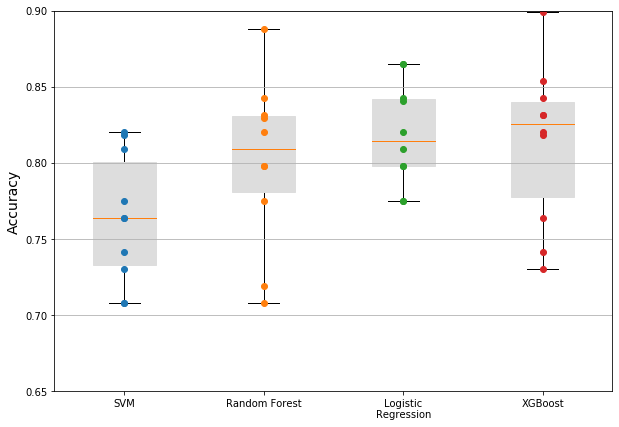

In [32]:
plt.figure(figsize=(10, 7))
c = '#dddddd'
plt.grid (True, axis='y', zorder=-1)
plt.boxplot([svm_scores, rf_scores, logit_scores, xgbScores], \
            labels=("SVM","Random Forest", 'Logistic\nRegression', 'XGBoost'),\
            patch_artist=True, zorder=1, boxprops=dict(facecolor=c, color=c))
plt.plot([1]*10, svm_scores, "o")
plt.plot([2]*10, rf_scores, "o")
plt.plot([3]*10, logit_scores, "o")
plt.plot([4]*10, xgbScores, "o")
plt.ylim ([0.650, 0.9])
plt.ylabel("Accuracy", fontsize=14)
plt.show()

### Tuning the models...

In [34]:
from sklearn.model_selection import GridSearchCV

In [236]:
# grid search for SVC

parameter_grid = {
    'C' : [ 1, 10, 100, 1000, 10000],
    'kernel' : ['linear', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
    }

svm_clf = SVC ()

grid_search = GridSearchCV (svm_clf,
                            scoring='accuracy',
                            param_grid=parameter_grid,
                            cv=3,
                            n_jobs=2,
                            verbose=1)

grid_search.fit (xTrain, yTrain)
model = grid_search.best_estimator_
parameters = grid_search.best_params_

print(f'Best score: {grid_search.best_score_}')
print(f'Best estimator: {grid_search.best_estimator_}')

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  7.9min
[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed: 61.9min finished


Best score: 0.8200224971878515
Best estimator: SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [237]:
# Find the best parameters for the random forest 
parameter_grid = {
    'max_depth' : [8, 10, 12],
    'n_estimators': [10, 50, 100],
    'max_features': ['sqrt'],
    'min_samples_split': [2, 3, 10],
    'min_samples_leaf': [1, 3, 10],
    'bootstrap': [True, False] }

rf_clf = RandomForestClassifier(n_jobs=2)

grid_search = GridSearchCV (rf_clf,
                            scoring='accuracy',
                            param_grid=parameter_grid,
                            cv=3,
                            n_jobs=2,
                            verbose=1)

grid_search.fit (xTrain, yTrain)
model = grid_search.best_estimator_
parameters = grid_search.best_params_

print(f'Best score: {grid_search.best_score_}')
print(f'Best estimator: {grid_search.best_estimator_}')


Fitting 3 folds for each of 162 candidates, totalling 486 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   10.3s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   37.4s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  1.2min


Best score: 0.8357705286839145
Best estimator: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=2,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)


[Parallel(n_jobs=2)]: Done 486 out of 486 | elapsed:  1.3min finished


In [240]:
# Find the best parameters for logit classifier
parameter_grid = {
    #'penalty': ['l2', 'elasticnet'],
    'C' : [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100] }

logit_clf = LogisticRegression(random_state=0, solver='lbfgs', max_iter=10000, n_jobs=2)

grid_search = GridSearchCV (logit_clf,
                            scoring='accuracy',
                            param_grid=parameter_grid,
                            cv=3,
                            n_jobs=2,
                            verbose=1)

grid_search.fit (xTrain, yTrain)
model = grid_search.best_estimator_
parameters = grid_search.best_params_

print(f'Best score: {grid_search.best_score_}')
print(f'Best estimator: {grid_search.best_estimator_}')

Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  18 out of  21 | elapsed:    1.7s remaining:    0.3s
[Parallel(n_jobs=2)]: Done  21 out of  21 | elapsed:    2.2s finished


Best score: 0.8177727784026997
Best estimator: LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=2, penalty='l2', random_state=0,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)


In [239]:
parameter_grid = {
    'max_depth' : [7, 8, 9],
    'max_delta_step': [1],
    'n_estimators': [20, 40, 60, 80],
    'colsample_bylevel': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'subsample': [0.3, 0.4, 0.5, 0.6],
}

xgb_clf = xgb.XGBClassifier()

grid_search = GridSearchCV (xgb_clf,
                            scoring='accuracy',
                            param_grid=parameter_grid,
                            cv=3,
                            n_jobs=2,
                            verbose=1)

grid_search.fit (xTrain, yTrain)
model = grid_search.best_estimator_
parameters = grid_search.best_params_

print(f'Best score: {grid_search.best_score_}')
print(f'Best estimator: {grid_search.best_estimator_}')

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  80 tasks      | elapsed:    3.4s
[Parallel(n_jobs=2)]: Done 680 tasks      | elapsed:   25.2s


Best score: 0.84251968503937
Best estimator: XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=0.8,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=1, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=60, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=0.3, tree_method=None,
              validate_parameters=False, verbosity=None)


[Parallel(n_jobs=2)]: Done 1296 out of 1296 | elapsed:   47.8s finished


In [41]:
#svm_clf = SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
#    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
#    max_iter=-1, probability=False, random_state=None, shrinking=True,
#    tol=0.001, verbose=False)
svm_clf = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=True)
svm_clf.fit (xTrain, yTrain)
svm_scores = cross_val_score(svm_clf, xTrain, yTrain, cv=10)
print (svm_scores.mean())

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]0.8256767109295199


In [39]:
#rf_clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
#                       max_depth=12, max_features='sqrt', max_leaf_nodes=None,
#                       min_impurity_decrease=0.0, min_impurity_split=None,
#                       min_samples_leaf=3, min_samples_split=10,
#                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
#                       oob_score=False, random_state=None, verbose=0,
#                       warm_start=False)
rf_clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=2,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
rf_clf.fit (xTrain, yTrain)
rf_scores = cross_val_score (rf_clf, xTrain, yTrain, cv=10)
print (rf_scores.mean())

0.8346271705822268


In [36]:
#logit_clf = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
#                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
#                   multi_class='warn', n_jobs=2, penalty='l2', random_state=0,
#                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)
logit_clf = LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=2, penalty='l2', random_state=0,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

logit_clf.fit (xTrain, yTrain)
logit_scores = cross_val_score (logit_clf, xTrain, yTrain, cv=10)
print (logit_scores.mean())

0.8200459652706844


In [38]:
#xgb_clf = xgb.XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=0.8,
#              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
#              importance_type='gain', interaction_constraints=None,
#              learning_rate=0.300000012, max_delta_step=1, max_depth=7,
#              min_child_weight=1, monotone_constraints=None,
#              n_estimators=40, n_jobs=0, num_parallel_tree=1,
#              objective='binary:logistic', random_state=0, reg_alpha=0,
#              reg_lambda=1, scale_pos_weight=1, subsample=0.3, tree_method=None,
#              validate_parameters=False, verbosity=None)
xgb_clf = xgb.XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=0.8,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=1, max_depth=7,
              min_child_weight=1, missing=np.nan, monotone_constraints=None,
              n_estimators=60, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=0.3, tree_method=None,
              validate_parameters=False, verbosity=None)
xgb_clf.fit (xTrain, yTrain)
xgbScores = cross_val_score (xgb_clf, xTrain, yTrain, cv=10)
print (xgbScores.mean())

0.8188840653728293


In [42]:
xgbScores

array([0.78651685, 0.82022472, 0.74157303, 0.84269663, 0.84269663,
       0.85393258, 0.85393258, 0.79775281, 0.84269663, 0.80681818])

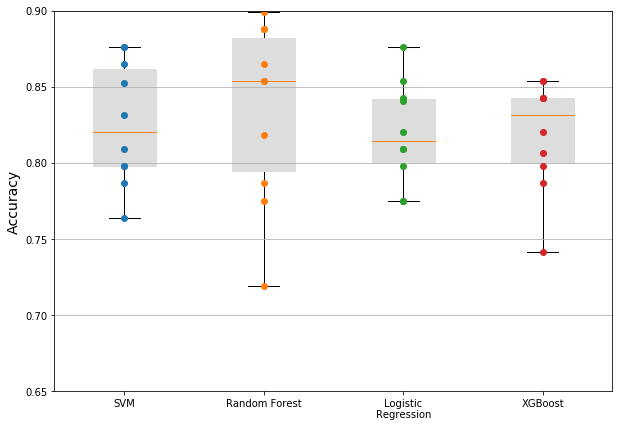

In [44]:
plt.figure(figsize=(10, 7))
c = '#dddddd'
plt.grid (True, axis='y', zorder=-1)
plt.boxplot([svm_scores, rf_scores, logit_scores, xgbScores], \
            labels=("SVM","Random Forest", 'Logistic\nRegression', 'XGBoost'),\
            patch_artist=True, zorder=1, boxprops=dict(facecolor=c, color=c))
plt.plot([1]*10, svm_scores, "o")
plt.plot([2]*10, rf_scores, "o")
plt.plot([3]*10, logit_scores, "o")
plt.plot([4]*10, xgbScores, "o")
plt.ylim ([0.650, 0.9])
plt.ylabel("Accuracy", fontsize=14)
plt.show()

Lets try out the test data...

In [45]:
cleanedTestingData = TransformData_V2 (rawTestData)

cleanedTestingData.info ()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 30 columns):
PassengerId    418 non-null int64
Age            418 non-null float64
Fare           418 non-null float64
Title_1        418 non-null uint8
Title_2        418 non-null uint8
Title_3        418 non-null uint8
Title_4        418 non-null uint8
Title_5        418 non-null uint8
Title_6        418 non-null uint8
TicketCount    418 non-null int64
FamSize        418 non-null int64
Single         418 non-null int64
SmallFamily    418 non-null int64
LargeFamily    418 non-null int64
AgeGroup_A     418 non-null uint8
AgeGroup_B     418 non-null uint8
AgeGroup_C     418 non-null uint8
AgeGroup_D     418 non-null uint8
AgeGroup_E     418 non-null uint8
FareGroup_A    418 non-null uint8
FareGroup_B    418 non-null uint8
FareGroup_C    418 non-null uint8
PClass_1       418 non-null uint8
PClass_2       418 non-null uint8
PClass_3       418 non-null uint8
Embarked_C     418 non-null uint8
Embarke

In [46]:
xTest = cleanedTestingData.drop (['PassengerId'], axis=1)

In [47]:
yPred_svm   = svm_clf.predict (xTest)
yPred_logit = logit_clf.predict (xTest)
yPred_rf    = rf_clf.predict (xTest)
yPred_xgb   = xgb_clf.predict (xTest)

In [48]:
output = pd.DataFrame({'PassengerId': cleanedTestingData.PassengerId, 'Survived': yPred_svm})
output.to_csv('sub_svm_tuned.csv', index=False)

output = pd.DataFrame({'PassengerId': cleanedTestingData.PassengerId, 'Survived': yPred_logit})
output.to_csv('sub_logit_tuned.csv', index=False)

output = pd.DataFrame({'PassengerId': cleanedTestingData.PassengerId, 'Survived': yPred_rf})
output.to_csv('sub_rf_tuned.csv', index=False)

output = pd.DataFrame({'PassengerId': cleanedTestingData.PassengerId, 'Survived': yPred_xgb})
output.to_csv('sub_xgb_tuned.csv', index=False)

In [ ]:
svm:   0.77033
logit: 0.77990
rf:    0.76555
xgb:   0.71531  